In [32]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.5.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /home/work/.local/lib/python3.10/site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bayesian-optimization, category-encoders, dtreeviz, factor_analyzer, featuretools, imbalanced-learn, librosa, lightgbm, lime, mlflow, mlxtend, nni, qudida, scikit-nni, scikit-optimize, scikit-plot, soynlp, vecstack


In [33]:
!pip show imbalanced-learn

Name: imbalanced-learn
Version: 0.12.3
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: /home/work/.local/lib/python3.10/site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 


In [1]:
from sklearn.preprocessing import RobustScaler #robust normlization for outliers
import sklearn.metrics as metrics #metrics librry
import seaborn as sns # for intractve graphs
from sklearn.ensemble import RandomForestClassifier #Random Forest
import matplotlib.pyplot as plt #for visualization
from xgboost.sklearn import XGBClassifier #XGBoost
from sklearn.metrics import classification_report
from xgboost import plot_importance #feature rimportance
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Model, load_model
from keras.layers import Input,Dense, BatchNormalization #layers of autoencoder
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping #callbacks
from keras import regularizers #regularization
from sklearn.ensemble import IsolationForest #Isolation Forest
from sklearn.mixture import GaussianMixture #Gaussian Mixture
from imblearn.over_sampling import SMOTE
# This Python 3 environment comes with many helpful analytics libraries installed

# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")

# Any results you write to the current directory are saved as output.
# Any results you write to the current directory are saved as output.
dataframe = pd.read_csv("/home/work/gnssl/creditcard.csv")
dataframe.info()

2024-07-19 07:07:37.823374: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-19 07:07:37.823436: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-19 07:07:37.823456: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-19 07:07:37.830110: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [35]:
dataframe.shape

(284807, 31)

In [2]:
RS=RobustScaler()
dataframe['Amount'] = RS.fit_transform(dataframe['Amount'].values.reshape(-1, 1))
dataframe['Time'] = RS.fit_transform(dataframe['Time'].values.reshape(-1, 1))
df = dataframe.sample(frac=1, random_state = 42)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,-0.507372,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,4.781527,1
49906,-0.474994,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,6.960386,0
29474,-0.578108,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0.125760,0
276481,0.968421,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.286453,0
278846,0.984281,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.294977,0


In [5]:
fraud_df_train = df.loc[df['Class'] == 1][:int(492*0.8)]
fraud_df_test = df.loc[df['Class'] == 1][int(492*0.8):]


#undersampling of the data. Fraude represent 10% of base now
normal_df_train_sup= df.loc[df['Class'] == 0][:int(492*0.8*9*3)]
normal_df_test= df.loc[df['Class'] == 0][int(492*0.8)*9*3:int(492*0.8*9*3)+int(284800*0.2)]
new_df_train = pd.concat([pd.DataFrame(normal_df_train_sup), fraud_df_train])

#oversampling of the data. The number of Fraud was twiced
sm = SMOTE(k_neighbors=5, random_state=0, n_jobs=8, sampling_strategy={1: int(492*0.8*3), 0: int(492*0.8*9*3)})

normal_df_train_sup, fraud_df_train = sm.fit_resample(new_df_train.drop('Class', axis=1), new_df_train['Class'])
fraud_df_train = pd.DataFrame(fraud_df_train.transpose()).rename(columns={0:"Class"})
new_df_train = pd.concat([pd.DataFrame(normal_df_train_sup), fraud_df_train ], axis=1)
new_df_train.columns=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount','Class']
new_df_test = pd.concat([pd.DataFrame(normal_df_test), fraud_df_test])

In [6]:
new_df_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.474994,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,6.960386,0
1,-0.578108,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0.125760,0
2,0.968421,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.286453,0
3,0.984281,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.294977,0
4,-0.197535,-0.641330,-0.057304,1.489998,-1.688131,-1.151043,0.259996,-1.391069,-2.334075,1.168644,...,-1.231634,0.257164,-0.371953,-0.038566,1.397514,-0.665947,0.031003,0.180357,1.089918,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11802,0.680354,-0.184181,1.685175,-4.322818,0.490501,0.140317,-1.593469,-1.291782,0.320481,-2.146076,...,0.204094,-0.318858,-0.259182,0.212973,0.550747,0.768697,0.057238,0.118161,-0.086755,1
11803,-0.130665,1.141071,1.222207,-1.431386,2.037993,0.801037,-1.043832,0.316433,-0.035426,-0.003241,...,-0.366784,-0.792336,-0.151237,-0.218652,0.684706,-0.330060,0.091191,0.120060,-0.293440,1
11804,-0.215457,-0.799949,1.835968,-1.405289,2.959344,0.107967,-0.517854,-1.302079,0.628327,-1.574778,...,0.239684,-0.144949,-0.122350,-0.621051,0.361286,0.010162,0.188140,0.049252,-0.209897,1
11805,-0.769477,-15.519362,7.846109,-20.110063,11.366039,-7.524204,-2.197191,-15.385563,-0.242523,-6.927248,...,-2.417861,0.816053,0.079586,-0.999429,0.678680,0.771081,2.226668,-1.245121,-0.293440,1


Normal 99.83 % of the test dataset
Fraud 0.17 % of the test dataset


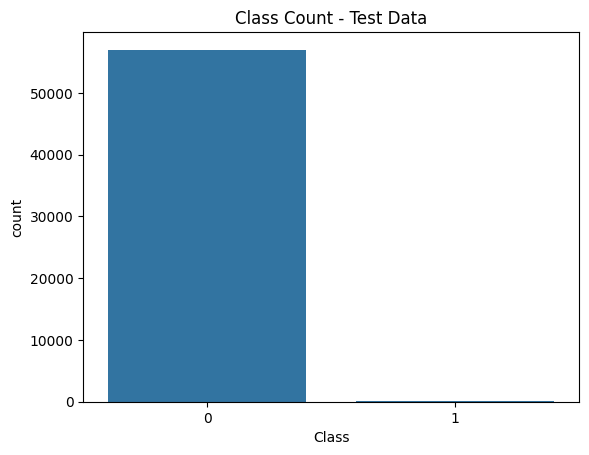

In [8]:
print('Normal', round(new_df_test['Class'].value_counts()[0] / len(new_df_test) * 100, 2), '% of the test dataset')
print('Fraud', round(new_df_test['Class'].value_counts()[1] / len(new_df_test) * 100, 2), '% of the test dataset')

sns.countplot(x="Class", data=new_df_test).set_title('Class Count - Test Data')
plt.show()

Normal 90.01 % of the train dataset
Fraude 9.99 % of the train dataset


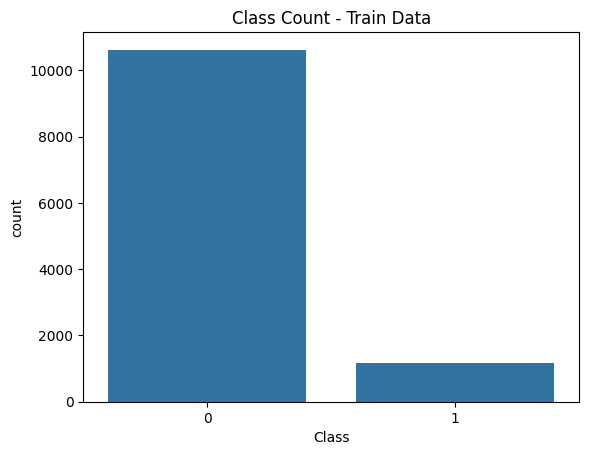

In [13]:
X_train_sup = new_df_train.drop('Class', axis=1)
y_train = new_df_train['Class']

X_test=new_df_test.drop('Class', axis=1)
y_test=new_df_test['Class']
#new_df_train.head()

print('Normal', round(
        pd.Series(y_train).value_counts()[0]/len(X_train_sup)*100, 2), '% of the train dataset')
print('Fraude', round(
        pd.Series(y_train).value_counts()[1]/len(X_train_sup)*100, 2), '% of the train dataset')
sns.countplot(x="Class",data=new_df_train).set_title('Class Count - Train Data')
plt.show()

In [14]:
#grid_search
"""
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, verbose=2, n_jobs = -1)
rf_random.fit(X_res,y_res)
rf_random.best_params_
"""

rfc = RandomForestClassifier(n_estimators = 1600,
 min_samples_split = 2,
 min_samples_leaf = 1,
 max_features = 'sqrt',
 max_depth = 100,
 bootstrap = False)
;

xgb = XGBClassifier(min_child_weight = 5,
 max_depth=12,
 learning_rate= 0.1,
 gamma= 0.2,
 colsample_bytree= 0.7)

In [15]:
rfc.fit(X_train_sup,y_train)
prediçtion_rfc = rfc.predict_proba(X_test.values)
tresholds = np.linspace(0 , 1 , 200)
scores_rfc=[]
for treshold in tresholds:
    y_hat_rfc = (prediçtion_rfc[:,0] < treshold).astype(int)
    scores_rfc.append([metrics.recall_score(y_pred=y_hat_rfc, y_true=y_test),
                 metrics.precision_score(y_pred=y_hat_rfc, y_true=y_test),
                 metrics.fbeta_score(y_pred=y_hat_rfc, y_true=y_test, beta=2),
                 metrics.cohen_kappa_score(y1=y_hat_rfc, y2=y_test)])
scores_rfc = np.array(scores_rfc)
final_tresh = tresholds[scores_rfc[:, 2].argmax()]
y_hat_rfc = (prediçtion_rfc < final_tresh).astype(int)
cm_rfc = metrics.confusion_matrix(y_test,y_hat_rfc[:,0])
best_score = scores_rfc[scores_rfc[:, 2].argmax(),:]
recall_score = best_score[0]
precision_score = best_score[1]
fbeta_score = best_score[2]
cohen_kappa_score = best_score[3]

print('The recall score is: %.3f' % recall_score)
print('The precision score is: %.3f' % precision_score)
print('The f2 score is: %.3f' % fbeta_score)
print('The Kappa score is: %.3f' % cohen_kappa_score)

The recall score is: 0.848
The precision score is: 0.923
The f2 score is: 0.862
The Kappa score is: 0.884


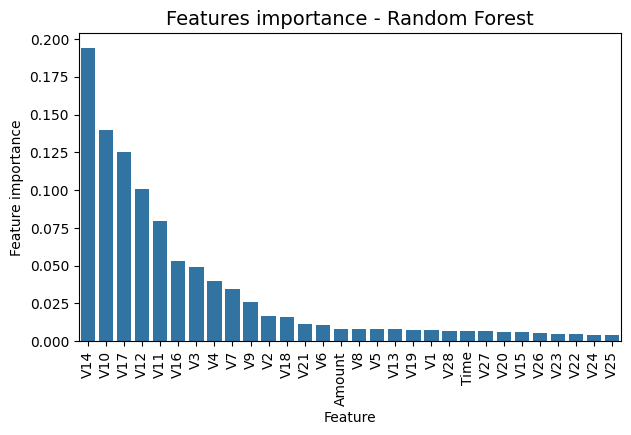

In [16]:
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': rfc.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance - Random Forest',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

In [17]:
y_true = y_test
y_pred_rfc = y_hat_rfc[:,0]
target_names = ['class 0 (Normal)', 'class 1 (Fraud)']
print(classification_report(y_true, y_pred_rfc, target_names=target_names))

                  precision    recall  f1-score   support

class 0 (Normal)       1.00      1.00      1.00     56976
 class 1 (Fraud)       0.92      0.85      0.88        99

        accuracy                           1.00     57075
       macro avg       0.96      0.92      0.94     57075
    weighted avg       1.00      1.00      1.00     57075



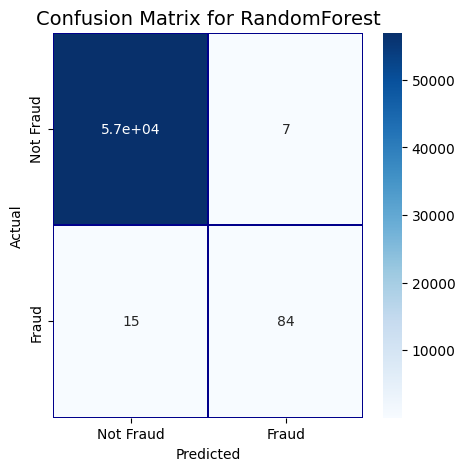

In [18]:
cm = pd.crosstab(y_test, y_pred_rfc, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for RandomForest', fontsize=14)
plt.show()

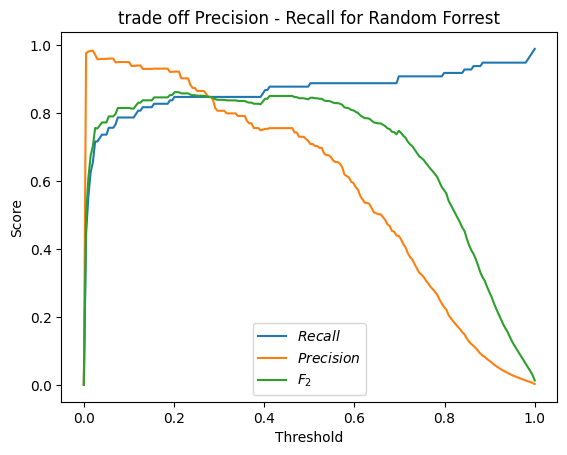

In [19]:
#precision_recall
plt.plot(tresholds, scores_rfc[:, 0], label='$Recall$')
plt.plot(tresholds, scores_rfc[:, 1], label='$Precision$')
plt.plot(tresholds, scores_rfc[:, 2], label='$F_2$')
plt.ylabel('Score')
# plt.xticks(np.logspace(-10, -200, 3))
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.title('trade off Precision - Recall for Random Forrest')
plt.show()

In [20]:
xgb = XGBClassifier(min_child_weight = 5,
 max_depth=12,
 learning_rate= 0.1,
 gamma= 0.2,
 colsample_bytree= 0.7)

xgb.fit(X_train_sup, y_train)

prediction_xgb = xgb.predict_proba(X_test)
tresholds = np.linspace(0 , 1 , 200)
scores_xgb=[]
for treshold in tresholds:
    y_hat_xgb = (prediction_xgb[:,0] < treshold).astype(int)
    scores_xgb.append([metrics.recall_score(y_pred=y_hat_xgb, y_true=y_test),
                 metrics.precision_score(y_pred=y_hat_xgb, y_true=y_test),
                 metrics.fbeta_score(y_pred=y_hat_xgb, y_true=y_test, beta=2),
                 metrics.cohen_kappa_score(y1=y_hat_xgb, y2=y_test)])  
scores_xgb = np.array(scores_xgb)
final_tresh = tresholds[scores_xgb[:, 2].argmax()]
y_hat_xgb = (prediction_xgb < final_tresh).astype(int)
best_score_xgb = scores_xgb[scores_xgb[:, 2].argmax(),:]
recall_score_xgb = best_score_xgb[0]
precision_score_xgb = best_score_xgb[1]
fbeta_score_xgb = best_score_xgb[2]
cohen_kappa_score_xgb = best_score_xgb[3]

print('The recall score is": %.3f' % recall_score_xgb)
print('The precision score is": %.3f' % precision_score_xgb)
print('The f2 score is": %.3f' % fbeta_score_xgb)
print('The Kappa score is": %.3f' % cohen_kappa_score_xgb)

The recall score is": 0.818
The precision score is": 0.942
The f2 score is": 0.840
The Kappa score is": 0.875


                  precision    recall  f1-score   support

class 0 (Normal)       1.00      1.00      1.00     56976
 class 1 (Fraud)       0.94      0.82      0.88        99

        accuracy                           1.00     57075
       macro avg       0.97      0.91      0.94     57075
    weighted avg       1.00      1.00      1.00     57075



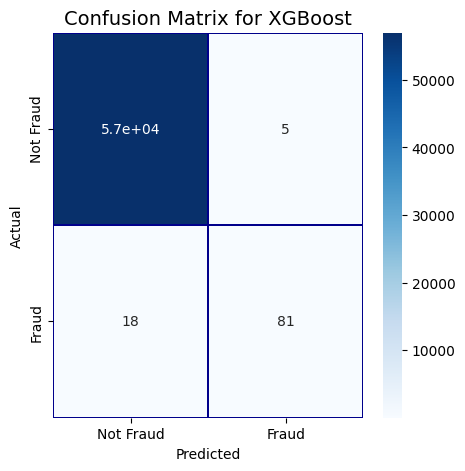

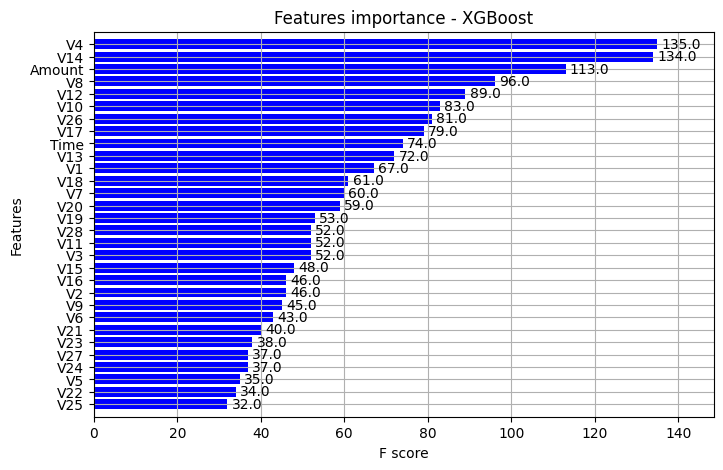

In [21]:
y_true = y_test
y_pred_xgb = y_hat_xgb[:,0]
target_names = ['class 0 (Normal)', 'class 1 (Fraud)']
print(classification_report(y_true, y_pred_xgb, target_names=target_names))
cm = pd.crosstab(y_test, y_pred_xgb, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for XGBoost', fontsize=14)
plt.show()
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
plot_importance(xgb, height=0.8, title="Features importance - XGBoost", ax=ax, color="blue") 
plt.show()

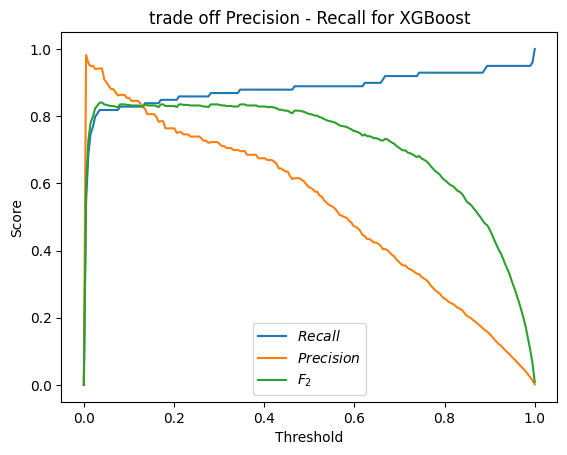

In [22]:
#precision_recall
plt.plot(tresholds, scores_xgb[:, 0], label='$Recall$')
plt.plot(tresholds, scores_xgb[:, 1], label='$Precision$')
plt.plot(tresholds, scores_xgb[:, 2], label='$F_2$')
plt.ylabel('Score')
# plt.xticks(np.logspace(-10, -200, 3))
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.title('trade off Precision - Recall for XGBoost')
plt.show()

In [23]:
scores=[]
for i in  list(range(1,11)):
    df = dataframe.sample(frac=1, random_state = i)
    #divid frauds in train (80%) and test (20%)
    fraud_df_train = df.loc[df['Class'] == 1][:int(492*0.8)]
    fraud_df_test = df.loc[df['Class'] == 1][int(492*0.8):]

    # undersmpling of norml data: the normal data represent 90% of the new base
    normal_df_train_sup= df.loc[df['Class'] == 0][:int(492*0.8*9)]
    normal_df_test= df.loc[df['Class'] == 0][int(492*0.8)*9:int(492*0.8*9)+int(284807*0.2)]
    new_df_train = pd.concat([normal_df_train_sup, fraud_df_train])
    new_df_test = pd.concat([normal_df_test, fraud_df_test])

    X_train_sup = new_df_train.drop('Class', axis=1)
    y_train = new_df_train['Class']
    X_test=new_df_test.drop('Class', axis=1)
    y_test=new_df_test['Class']

    rfc.fit(X_train_sup,y_train)
    prediction_rfc = rfc.predict_proba(X_test.values)
    tresholds = np.linspace(0 , 1 , 200)
    scores_rfc=[]
    for treshold in tresholds:
        y_hat_rfc = (prediction_rfc[:,0] < treshold).astype(int)
        scores_rfc.append([metrics.recall_score(y_pred=y_hat_rfc, y_true=y_test),
                 metrics.precision_score(y_pred=y_hat_rfc, y_true=y_test),
                 metrics.fbeta_score(y_pred=y_hat_rfc, y_true=y_test, beta=2),
                 metrics.cohen_kappa_score(y1=y_hat_rfc, y2=y_test)])
    scores_rfc = np.array(scores_rfc)
    #choice the model with best f2 score
    best_scores = scores_rfc[scores_rfc[:, 2].argmax(),:]
    scores.append(best_scores)
    print('recall, precision, f2, kappa in shuffle %1d' %i)
    print(best_scores)

    recall_score_rfc = np.mean(scores, axis=0)[0]
    precision_score_rfc = np.mean(scores,axis=0)[1]
    fbeta_score_rfc = np.mean(scores, axis=0)[2]
    cohen_kappa_score_rfc = np.mean(scores, axis=0)[3]
print('--------------------------------------------------')
print("for the random forest algorithm:")
print('The recall score is: %.3f' % recall_score_rfc)
print('The precision score is: %.3f' % precision_score_rfc)
print('The f2 score is: %.3f' % fbeta_score_rfc)
print('The Kappa score is: %.3f' % cohen_kappa_score_rfc)

recall, precision, f2, kappa in shuffle 1
[0.82828283 0.82828283 0.82828283 0.8279844 ]
recall, precision, f2, kappa in shuffle 2
[0.84848485 0.81553398 0.84168337 0.83138485]
recall, precision, f2, kappa in shuffle 3
[0.83838384 0.79807692 0.83       0.81740942]
recall, precision, f2, kappa in shuffle 4
[0.76767677 0.82608696 0.77868852 0.79546969]
recall, precision, f2, kappa in shuffle 5
[0.88888889 0.8        0.86956522 0.84181639]
recall, precision, f2, kappa in shuffle 6
[0.82828283 0.73873874 0.8086785  0.78054991]
recall, precision, f2, kappa in shuffle 7
[0.82828283 0.91111111 0.8436214  0.86750595]
recall, precision, f2, kappa in shuffle 8
[0.82828283 0.85416667 0.83333333 0.84075362]
recall, precision, f2, kappa in shuffle 9
[0.8989899  0.79464286 0.87598425 0.84331332]
recall, precision, f2, kappa in shuffle 10
[0.86868687 0.87755102 0.87044534 0.87287703]
--------------------------------------------------
for the random forest algorithm:
The recall score is: 0.842
The prec

In [24]:
scores=[]

for i in  list(range(1,11)):
    df = dataframe.sample(frac=1, random_state = i)
    #divid frauds in train (80%) and test (20%)
    fraud_df_train = df.loc[df['Class'] == 1][:int(492*0.8)]
    fraud_df_test = df.loc[df['Class'] == 1][int(492*0.8):]

    # undersmpling of norml data: the normal data represent 90% of the new base
    normal_df_train_sup= df.loc[df['Class'] == 0][:int(492*0.8*9)]
    normal_df_test= df.loc[df['Class'] == 0][int(492*0.8)*9:int(492*0.8*9)+int(284807*0.2)]
    new_df_train = pd.concat([normal_df_train_sup, fraud_df_train])
    new_df_test = pd.concat([normal_df_test, fraud_df_test])
    
    X_train_sup = new_df_train.drop('Class', axis=1)
    y_train = new_df_train['Class']
    X_test=new_df_test.drop('Class', axis=1)
    y_test=new_df_test['Class']

    xgb.fit(X_train_sup.values,y_train)
    prediction_xgb = xgb.predict_proba(X_test.values)
    tresholds = np.linspace(0 , 1 , 200)
    scores_xgb=[]
    for treshold in tresholds:
        y_hat_xgb = (prediction_xgb[:,0] < treshold).astype(int)
        scores_xgb.append([metrics.recall_score(y_pred=y_hat_xgb, y_true=y_test),
                 metrics.precision_score(y_pred=y_hat_xgb, y_true=y_test),
                 metrics.fbeta_score(y_pred=y_hat_xgb, y_true=y_test, beta=2),
                 metrics.cohen_kappa_score(y1=y_hat_xgb, y2=y_test)])
    scores_xgb = np.array(scores_xgb)
    #choice the model with best f2 score
    best_scores = scores_xgb[scores_xgb[:, 2].argmax(),:]
    
    print('recall, precision, f2, kappa in shuffle %1d' %i)
    print(best_scores)
    scores.append(best_scores)
    
recall_score_xgb = np.mean(scores, axis=0)[0]
precision_score_xgb = np.mean(scores,axis=0)[1]
fbeta_score_xgb = np.mean(scores, axis=0)[2]
cohen_kappa_score_xgb = np.mean(scores, axis=0)[3]

print('---------------------------------------------')
print("for the XGBoost algorithm classifier:")
print('The recall score is: %.3f' % recall_score_xgb)
print('The precision score is: %.3f' % precision_score_xgb)
print('The f2 score is: %.3f' % fbeta_score_xgb)
print('The Kappa score is: %.3f' % cohen_kappa_score_xgb)

recall, precision, f2, kappa in shuffle 1
[0.84848485 0.71186441 0.81712062 0.7737667 ]
recall, precision, f2, kappa in shuffle 2
[0.83838384 0.83       0.83669355 0.83388121]
recall, precision, f2, kappa in shuffle 3
[0.82828283 0.7961165  0.82164329 0.81154778]
recall, precision, f2, kappa in shuffle 4
[0.76767677 0.84444444 0.781893   0.80390881]
recall, precision, f2, kappa in shuffle 5
[0.87878788 0.79090909 0.85968379 0.83222951]
recall, precision, f2, kappa in shuffle 6
[0.7979798  0.75238095 0.78842315 0.77410638]
recall, precision, f2, kappa in shuffle 7
[0.84848485 0.83168317 0.84507042 0.83971915]
recall, precision, f2, kappa in shuffle 8
[0.82828283 0.82828283 0.82828283 0.8279844 ]
recall, precision, f2, kappa in shuffle 9
[0.90909091 0.89108911 0.9054326  0.89982447]
recall, precision, f2, kappa in shuffle 10
[0.87878788 0.78378378 0.85798817 0.82825645]
---------------------------------------------
for the XGBoost algorithm classifier:
The recall score is: 0.842
The prec

<Figure size 640x480 with 0 Axes>

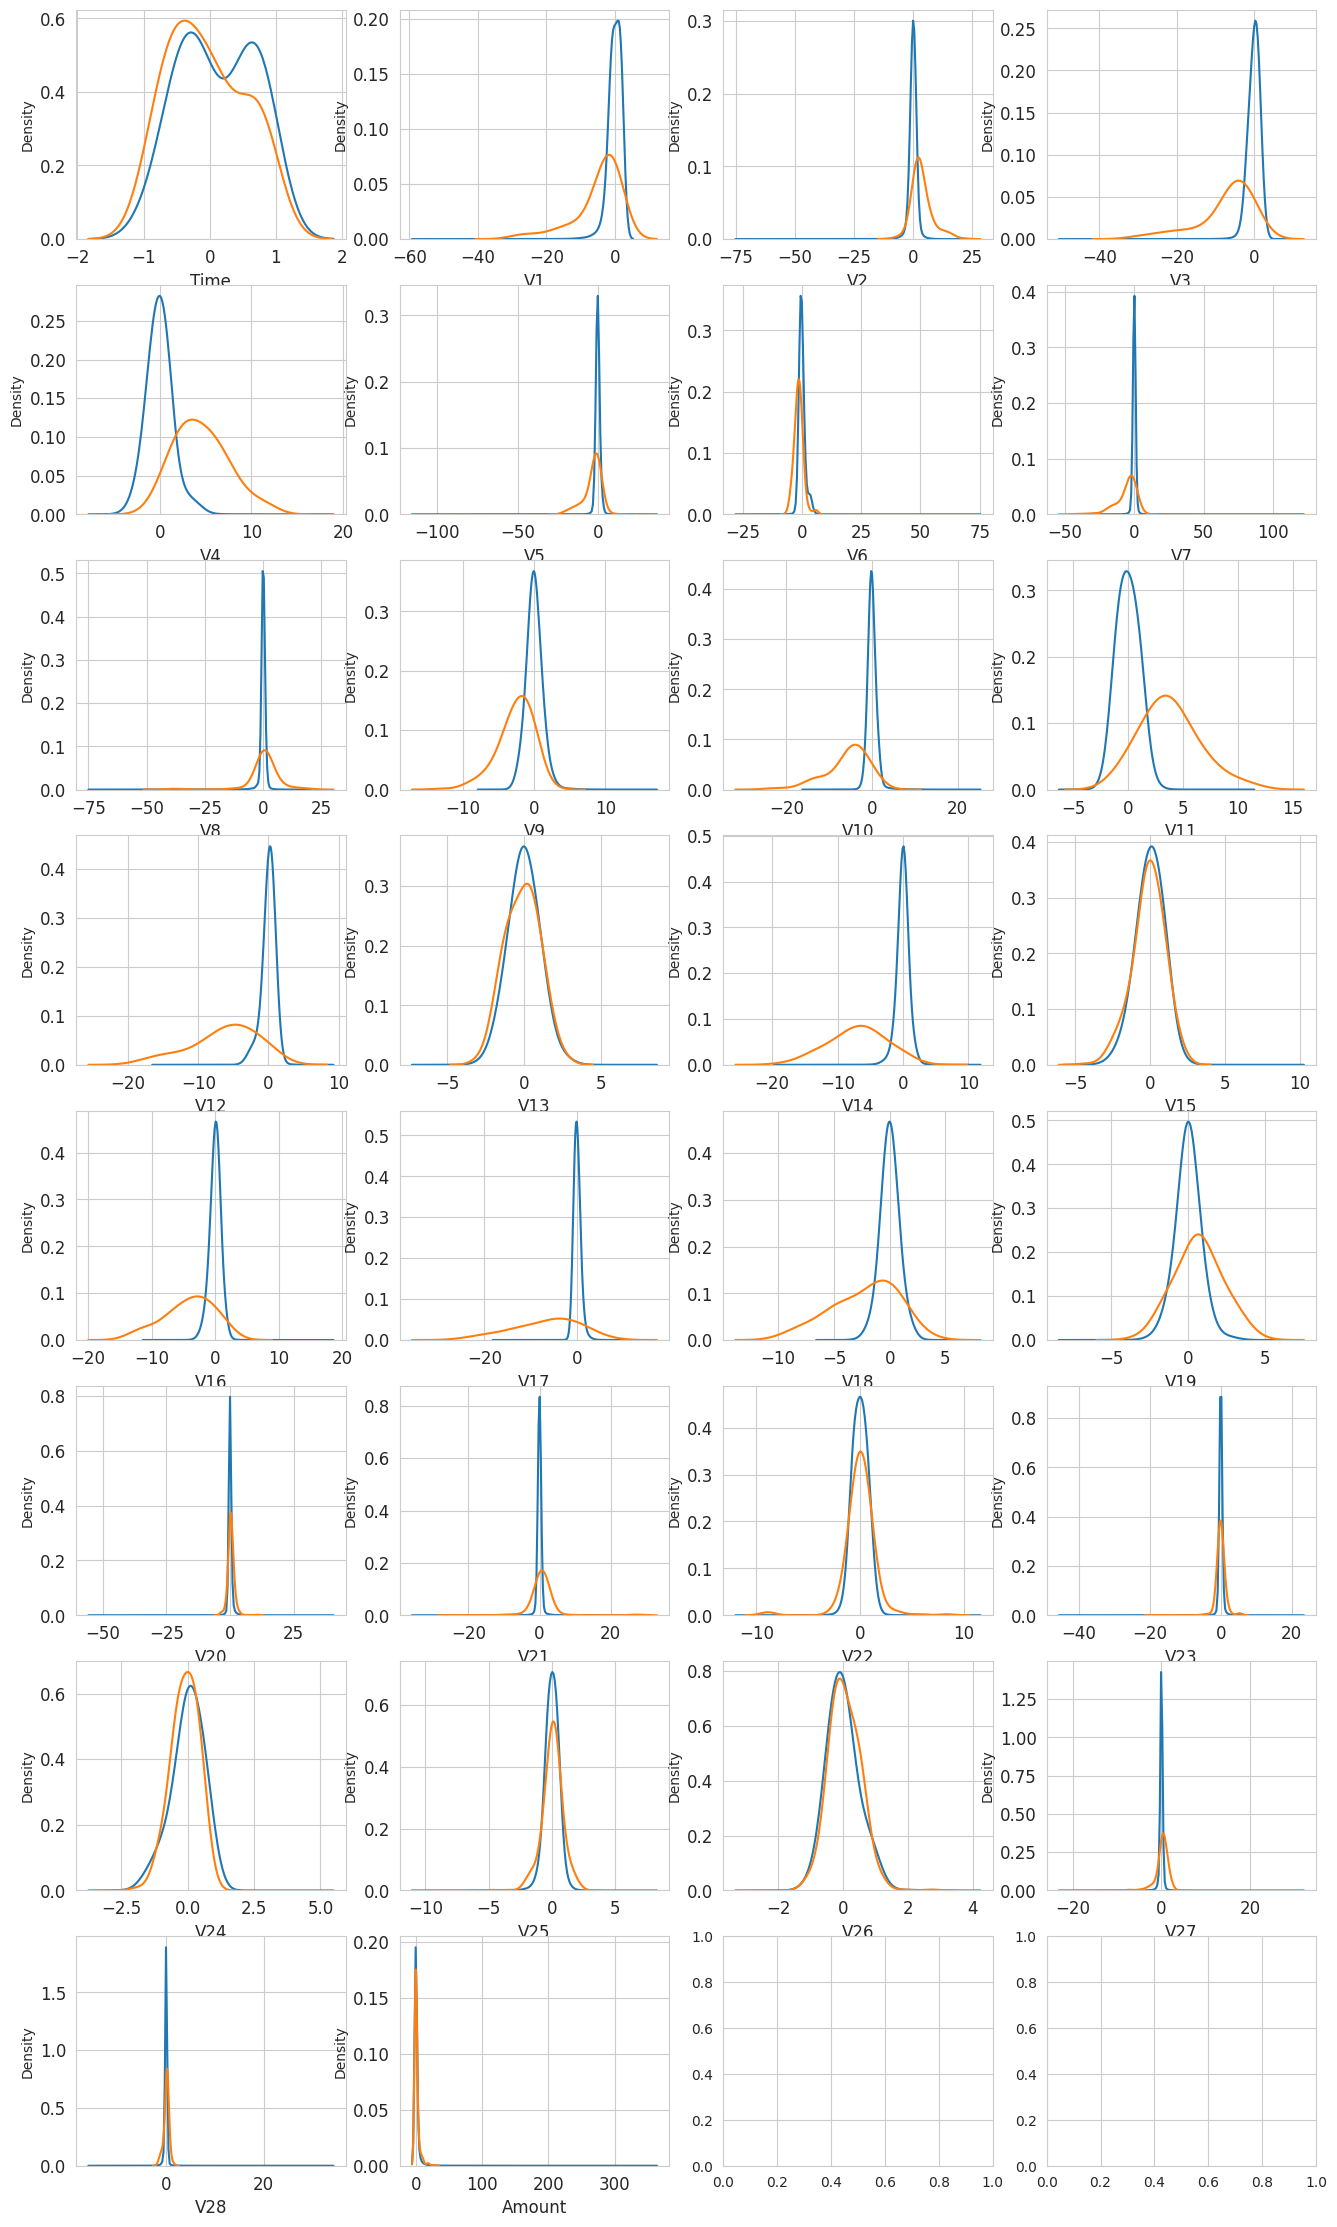

In [25]:
i = 0
t0 = dataframe.loc[df['Class'] == 0]
t1 = dataframe.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in predictors:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [26]:
df = dataframe.sample(frac=1, random_state=42)
fraude_df_train = df.loc[df['Class'] == 1][:int(492*0.8)]
fraude_df_test = df.loc[df['Class'] == 1][int(492*0.8):]

normal_df_test= df.loc[df['Class'] == 0][int(492*0.8)*9:int(492*0.8*9)+int(284807*0.2)]

new_df_train_semisup= df.loc[df['Class'] == 0][:int(284807*.8)]
new_df_test = pd.concat([normal_df_test, fraude_df_test])

X_train_semisup = new_df_train_semisup.drop('Class', axis=1)
#X_train_semisup=X_train_semisup[['V4','V5', 'V7','V9','V10','V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'Amount']]
X_test = new_df_test.drop('Class', axis=1)
#X_test=X_test[['V4','V5', 'V7','V9','V10','V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'Amount']]
y_test = new_df_test['Class']

In [27]:
X_train_semisup.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49906,-0.474994,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,6.960386
29474,-0.578108,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,0.125760
276481,0.968421,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.286453
278846,0.984281,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.294977
101565,-0.197535,-0.641330,-0.057304,1.489998,-1.688131,-1.151043,0.259996,-1.391069,-2.334075,1.168644,...,0.618411,-1.231634,0.257164,-0.371953,-0.038566,1.397514,-0.665947,0.031003,0.180357,1.089918


The recall score is": 0.828
The precision score is": 0.672
The f2 score is": 0.792
The Kappa score is": 0.742
                  precision    recall  f1-score   support

class 0 (Normal)       1.00      1.00      1.00     56966
 class 1 (Fraud)       0.67      0.83      0.74        99

        accuracy                           1.00     57065
       macro avg       0.84      0.91      0.87     57065
    weighted avg       1.00      1.00      1.00     57065



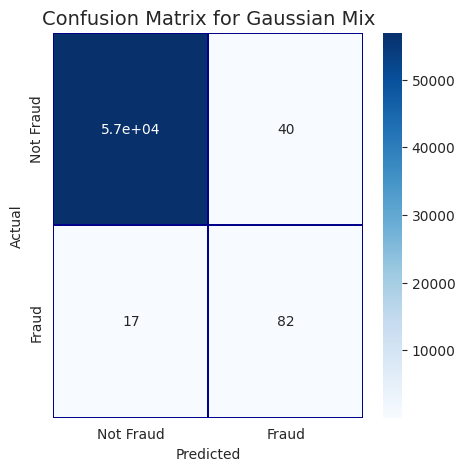

In [28]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, n_init=5)
gmm.fit(X_train_semisup)

prediction_MG = gmm.score_samples(X_test)

scores_MG = []
tresholds = np.linspace(-1000 , 100 , 200)

for treshold in tresholds:
    y_hat_MG = (prediction_MG < treshold).astype(int)
    scores_MG.append([metrics.recall_score(y_pred=y_hat_MG, y_true=y_test),
                 metrics.precision_score(y_pred=y_hat_MG, y_true=y_test),
                 metrics.fbeta_score(y_pred=y_hat_MG, y_true=y_test, beta=2),
                 metrics.cohen_kappa_score(y1=y_hat_MG, y2=y_test)])
    
scores_MG=np.array(scores_MG)
final_tresh = tresholds[scores_MG[:, 2].argmax()]
y_hat_MG = (prediction_MG < final_tresh).astype(int)
best_score = scores_MG[scores_MG[:, 2].argmax(),:]
recall_score = best_score[0]
precision_score = best_score[1]
fbeta_score = best_score[2]
cohen_kappa_score = best_score[3]

print('The recall score is": %.3f' % recall_score)
print('The precision score is": %.3f' % precision_score)
print('The f2 score is": %.3f' % fbeta_score)
print('The Kappa score is": %.3f' % cohen_kappa_score)
target_names = ['class 0 (Normal)', 'class 1 (Fraud)']
print(classification_report(y_test, y_hat_MG, target_names=target_names))

cm = pd.crosstab(y_test, y_hat_MG, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Gaussian Mix', fontsize=14)
plt.show()

The recall score is": 0.636
The precision score is": 0.352
The f2 score is": 0.548
The Kappa score is": 0.452
                  precision    recall  f1-score   support

class 0 (Normal)       1.00      1.00      1.00     56966
 class 1 (Fraud)       0.35      0.64      0.45        99

        accuracy                           1.00     57065
       macro avg       0.68      0.82      0.73     57065
    weighted avg       1.00      1.00      1.00     57065



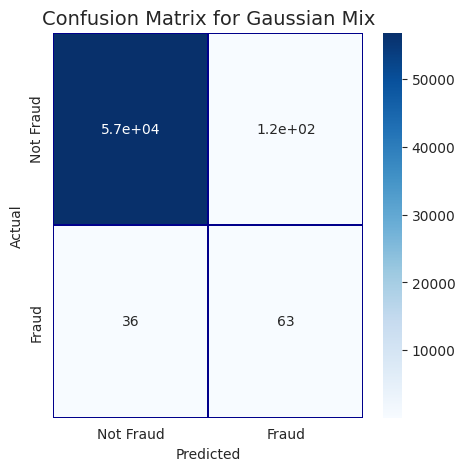

In [29]:
model_IF = IsolationForest(random_state=42, n_jobs=4, max_samples=X_train_semisup.shape[0], bootstrap=False, n_estimators=100)
model_IF.fit(X_train_semisup)
tresholds = np.linspace(-.2, .2, 200)
prediction_IF = model_IF.decision_function(X_test)
scores_IF = []
for treshold in tresholds:
    y_hat_IF = (prediction_IF < treshold).astype(int)
    scores_IF.append([metrics.recall_score(y_pred=y_hat_IF, y_true=y_test),
                 metrics.precision_score(y_pred=y_hat_IF, y_true=y_test),
                 metrics.fbeta_score(y_pred=y_hat_IF, y_true=y_test, beta=2),
                 metrics.cohen_kappa_score(y1=y_hat_IF, y2=y_test)])
scores_IF=np.array(scores_IF)
a=scores_IF[:,2].argmax()
opt_trh=tresholds[a]
y_hat_IF = (prediction_IF < opt_trh).astype(int)
best_score = scores_IF[scores_IF[:, 2].argmax(),:]
recall_score = best_score[0]
precision_score = best_score[1]
fbeta_score = best_score[2]
cohen_kappa_score = best_score[3]

print('The recall score is": %.3f' % recall_score)
print('The precision score is": %.3f' % precision_score)
print('The f2 score is": %.3f' % fbeta_score)
print('The Kappa score is": %.3f' % cohen_kappa_score)
target_names = ['class 0 (Normal)', 'class 1 (Fraud)']
print(classification_report(y_test, y_hat_IF, target_names=target_names))

cm = pd.crosstab(y_test, y_hat_IF, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Gaussian Mix', fontsize=14)
plt.show()

In [30]:
from numpy.random import seed
seed(4)
input_dim = X_train_semisup.shape[1]

Input_layer=Input(shape=(input_dim,))
#encoder
encoding_dim = 100
from keras import initializers
#init = initializers.VarianceScaling(scale=1.0, mode='fan_in', distribution='normal', seed=42)
#encoder
encoder=Dense(units=encoding_dim,activation='tanh', use_bias=False, 
              activity_regularizer=regularizers.l1(10e-5))(Input_layer)
encoder=BatchNormalization()(encoder)
encoder=Dense(units=int(encoding_dim/2), activation='relu')(encoder)
encoder=Dense(units=int(encoding_dim/4), activation='relu')(encoder)

#decoder
decoder=Dense(units=int(encoding_dim/2), activation='relu')(encoder)
decoder=Dense(units=int(encoding_dim), activation='relu')(decoder)
decoder=Dense(units=input_dim,activation='relu')(decoder)


#modelo
autoencoder=Model(inputs=Input_layer,outputs=decoder)
encodermodel=Model(inputs=Input_layer,outputs=encoder)

epochs= 400
batch_size=128

#TensorBoard=TensorBoard(log_dir='./logs',histogram_freq=0,write_grads=True,write_images=True)
best_weights_filepath = './best_weights.hdf5'

earlyStopping=EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='auto')

saveBestModel = ModelCheckpoint(best_weights_filepath, monitor='val_loss', 
                                verbose=1, save_best_only=True, mode='auto')
#we use 90% of data for train and 10% for validation
autoencoder.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

history=autoencoder.fit(X_train_semisup[5000*0:5000*1],X_train_semisup[5000*0:5000*1],
                    epochs=epochs,batch_size=batch_size,shuffle=False,
                    validation_split=0.1,verbose=0, 
                    callbacks=[saveBestModel,earlyStopping]).history
autoencoder.load_weights(best_weights_filepath)
predictions_AE=autoencoder.predict(X_test)
#mse is the mean squared error between the original data points and the reconstruction data points
mse=np.mean(np.power(X_test - predictions_AE, 2), axis=1)

2024-07-19 07:37:16.365194: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1883] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38698 MB memory:  -> device: 0, name: CUDA GPU, pci bus id: 0000:88:00.0, compute capability: 8.0
2024-07-19 07:37:18.517595: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f2d28428fd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-19 07:37:18.517640: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): CUDA GPU, Compute Capability 8.0
2024-07-19 07:37:18.524899: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-19 07:37:18.553841: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2024-07-19 07:37:18.627994: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This lin


Epoch 1: val_loss improved from inf to 1.08207, saving model to ./best_weights.hdf5

Epoch 2: val_loss improved from 1.08207 to 1.01220, saving model to ./best_weights.hdf5

Epoch 3: val_loss improved from 1.01220 to 0.90783, saving model to ./best_weights.hdf5

Epoch 4: val_loss improved from 0.90783 to 0.85154, saving model to ./best_weights.hdf5

Epoch 5: val_loss improved from 0.85154 to 0.80975, saving model to ./best_weights.hdf5

Epoch 6: val_loss improved from 0.80975 to 0.77523, saving model to ./best_weights.hdf5

Epoch 7: val_loss improved from 0.77523 to 0.75143, saving model to ./best_weights.hdf5

Epoch 8: val_loss improved from 0.75143 to 0.73543, saving model to ./best_weights.hdf5

Epoch 9: val_loss improved from 0.73543 to 0.72467, saving model to ./best_weights.hdf5

Epoch 10: val_loss improved from 0.72467 to 0.71499, saving model to ./best_weights.hdf5

Epoch 11: val_loss improved from 0.71499 to 0.70978, saving model to ./best_weights.hdf5

Epoch 12: val_loss imp


Epoch 127: val_loss did not improve from 0.65017

Epoch 128: val_loss did not improve from 0.65017

Epoch 129: val_loss did not improve from 0.65017

Epoch 130: val_loss did not improve from 0.65017

Epoch 131: val_loss did not improve from 0.65017

Epoch 132: val_loss did not improve from 0.65017

Epoch 133: val_loss did not improve from 0.65017

Epoch 134: val_loss did not improve from 0.65017

Epoch 135: val_loss did not improve from 0.65017

Epoch 136: val_loss did not improve from 0.65017

Epoch 137: val_loss did not improve from 0.65017

Epoch 138: val_loss did not improve from 0.65017

Epoch 139: val_loss improved from 0.65017 to 0.64991, saving model to ./best_weights.hdf5

Epoch 140: val_loss did not improve from 0.64991

Epoch 141: val_loss did not improve from 0.64991

Epoch 142: val_loss did not improve from 0.64991

Epoch 143: val_loss did not improve from 0.64991

Epoch 144: val_loss did not improve from 0.64991

Epoch 145: val_loss did not improve from 0.64991

Epoch 14


Epoch 282: val_loss did not improve from 0.63770

Epoch 283: val_loss did not improve from 0.63770

Epoch 284: val_loss did not improve from 0.63770

Epoch 285: val_loss did not improve from 0.63770

Epoch 286: val_loss improved from 0.63770 to 0.63760, saving model to ./best_weights.hdf5

Epoch 287: val_loss did not improve from 0.63760

Epoch 288: val_loss did not improve from 0.63760

Epoch 289: val_loss did not improve from 0.63760

Epoch 290: val_loss did not improve from 0.63760

Epoch 291: val_loss did not improve from 0.63760

Epoch 292: val_loss did not improve from 0.63760

Epoch 293: val_loss did not improve from 0.63760

Epoch 294: val_loss did not improve from 0.63760

Epoch 295: val_loss did not improve from 0.63760

Epoch 296: val_loss did not improve from 0.63760

Epoch 297: val_loss did not improve from 0.63760

Epoch 298: val_loss did not improve from 0.63760

Epoch 299: val_loss did not improve from 0.63760

Epoch 300: val_loss improved from 0.63760 to 0.63702, savi

Text(0.5, 1.0, 'loss in train and validation split')

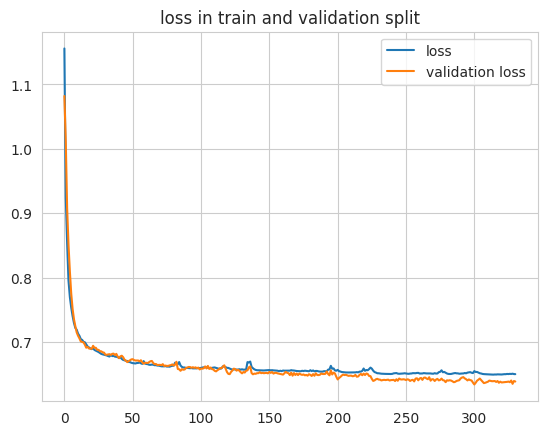

In [31]:
#plotting the history of the model\qz
plt.figure()
plt.plot(history['loss'],label='loss')
plt.legend()
plt.plot(history['val_loss'],label='validation loss')
plt.legend()
plt.title('loss in train and validation split')

The recall score is": 0.626
The precision score is": 0.197
The f2 score is": 0.437
The Kappa score is": 0.298
                  precision    recall  f1-score   support

class 0 (Normal)       1.00      1.00      1.00     56966
 class 1 (Fraud)       0.20      0.63      0.30        99

        accuracy                           0.99     57065
       macro avg       0.60      0.81      0.65     57065
    weighted avg       1.00      0.99      1.00     57065



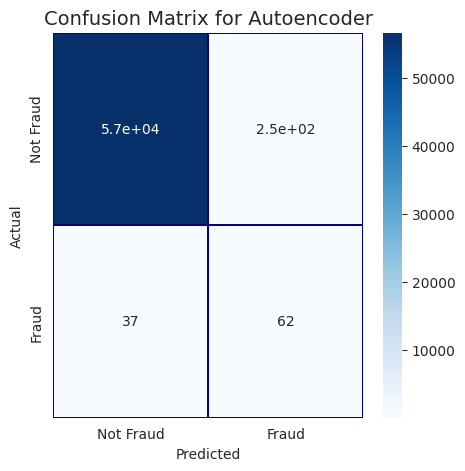

In [32]:
fpr, tpr, tresholds = metrics.roc_curve(y_test, mse)
scores_AE=[]
for treshold in tresholds:
    y_hat_AE = (mse > treshold).astype(int)
    scores_AE.append([metrics.recall_score(y_pred=y_hat_AE, y_true=y_test),
                 metrics.precision_score(y_pred=y_hat_AE, y_true=y_test),
                 metrics.fbeta_score(y_pred=y_hat_AE, y_true=y_test, beta=2),
                 metrics.cohen_kappa_score(y1=y_hat_AE, y2=y_test)])

scores_AE = np.array(scores_AE)
final_tresh = tresholds[scores_AE[:, 2].argmax()]
y_hat_AE = (mse > final_tresh).astype(int)
best_score_AE = scores_AE[scores_AE[:, 2].argmax(),:]
recall_score_AE = best_score_AE[0]
precision_score_AE = best_score_AE[1]
fbeta_score_AE = best_score_AE[2]
cohen_kappa_score_AE = best_score_AE[3]

print('The recall score is": %.3f' % recall_score_AE)
print('The precision score is": %.3f' % precision_score_AE)
print('The f2 score is": %.3f' % fbeta_score_AE)
print('The Kappa score is": %.3f' % cohen_kappa_score_AE)
target_names = ['class 0 (Normal)', 'class 1 (Fraud)']
print(classification_report(y_test, y_hat_AE, target_names=target_names))

cm = pd.crosstab(y_test, y_hat_AE, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix for Autoencoder', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Reconstruction error')

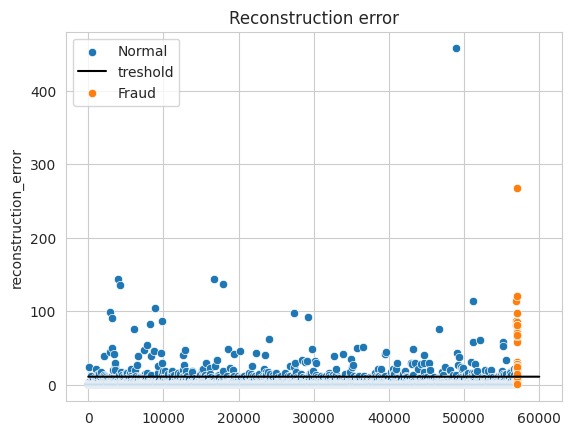

In [33]:
y_test=np.array(y_test)
mse=np.array(mse)
error_df=pd.DataFrame({'reconstruction_error':mse,'true_class':y_test})
t0 = error_df.loc[error_df['true_class'] == 0]
t1 = error_df.loc[error_df['true_class'] == 1]
t2=final_tresh*np.ones((60000,), dtype=int)
sns.scatterplot(data = t0['reconstruction_error'] ,label="Normal")
sns.lineplot(data=t2, color='black', label='treshold')
sns.scatterplot(data = t1['reconstruction_error'],label="Fraud").set_title('Reconstruction error')